In this notebook we will be performing a quick evaluation of the stroke dataset to understand the different features, data types and structure of the dataset for future modelling.

In [1]:
# Importing libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Importing the stroke dataset from local folder
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
### Reviewing the first few rows of the dataset to get a feel for the different attributes.
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
### Overview of the dataset and it's attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Looks like we have a mix of data types, including some string, int and float. Additionally we have some missing values in the 'bmi' column.

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

About 201 missing values in the 'bmi' column. All others look complete, which is great news!

Let us look at the different types categorical values in each categorical column.

In [60]:
# Here we can get a general overview of the data. Since hypertension, heart disease and stroke are coded as 0 and 1
# we do not get any meaningful information from those columns. We can see that age distribution is quite large and 
# there appears to be a person under 1 year old.
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [29]:
for i in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
         'stroke']:
    print(str(i) + ' : ' + str(df[i].unique()))

gender : ['Male' 'Female' 'Other']
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke : [1 0]


Categorical variables seem to be following specific categories and don't seem to have any incorrect values. 

Let us focus on the missing values in the bmi group. Can we identify any specific groups that are contributing to these missing values, primarily looking at the age and gender. 

Text(0.5, 1.0, 'Gender distribution for missing bmi cohort')

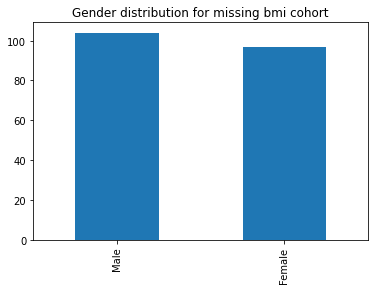

In [58]:
plt.subplots()
df[df.bmi.isnull()==True].gender.value_counts().plot(kind = 'bar')
plt.title('Gender distribution for missing bmi cohort')

Text(0.5, 1.0, 'Age distribution for missing bmi cohort')

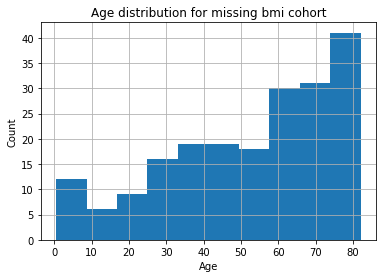

In [59]:
df[df.bmi.isnull()==True].age.hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for missing bmi cohort')

Looks like the missing bmi data isn't skewed to a specific gender. However most of the missing data is from the older patients 60 years or older. Interestingly there is data from age groups under 10 years as well! How about information about stroke outcomes in this group? Is there value in keeping this group if it is critical for stroke outcomes? 

In [51]:
#Lets look at the stroke distribution for the whole dataset
stroke_per = pd.concat([df.stroke.value_counts(), 100 * (df.stroke.value_counts())/len(df.stroke)],axis=1)
stroke_per.columns = ['counts' , '%']
print(stroke_per)

   counts          %
0    4861  95.127202
1     249   4.872798


Only about 5% of the dataset has stroke as an outcome. 95% of the data contains patient that did not have a stroke. How about the distribution among the patients that have missing bmi. 

In [57]:
#Lets look at the stroke distribution for the missing bmi subgroup
stroke_per_missing = pd.concat([df[df.bmi.isnull()==True].stroke.value_counts(), 100 * (df[df.bmi.isnull()==True].stroke.value_counts())/df.bmi.isnull().sum()],axis=1)
stroke_per_missing.columns = ['counts' , '%']
print(stroke_per_missing)

   counts          %
0     161  80.099502
1      40  19.900498


About 20% of the missing bmi data has a positive stroke as an outcome! And this is about 17% of all positive stroke outcome data which is a considerable number! We need to take into consideration whethere it would be acceptable to throw out all the stroke data from the missing bmi cohort or if we have to consider estimating the bmi for these cases in order to keep the valuable stroke data. We will need to revisit this. 

Circling back to the age distribution of this dataset, we noticed that there were individuals under 1 years of age. Let us investigate this further.

In [64]:
df_children = df[df.age < 18]
df_children

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
253,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


Looks like there are 856 persons in this dataset that are not adults. 

<AxesSubplot:>

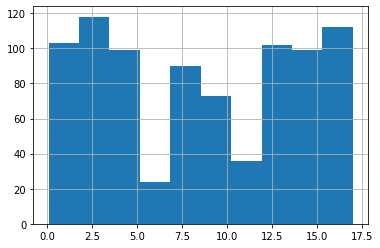

In [66]:
df_children.age.hist()

For the most part there seem to be an even distribution across ages under 18 in this dataset. 

<AxesSubplot:>

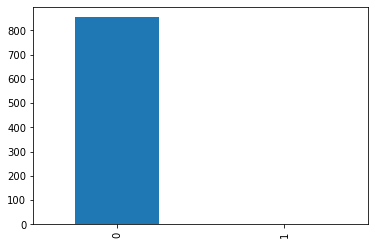

In [73]:
df_children.stroke.value_counts().plot(kind = 'bar')

It is good to know however that there are almost no strokes in this age group. Only 2. 

In [74]:
df_children.work_type.value_counts()

children         687
Private          134
Never_worked      17
Self-employed     12
Govt_job           6
Name: work_type, dtype: int64

The work_type for children group is a little odd, considering they are all children. However, we will not alter this for now. 

<AxesSubplot:>

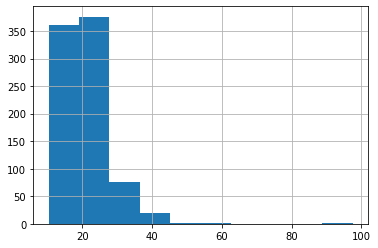

In [75]:
df_children.bmi.hist()

The BMI distribution in children is motly under 40, however there seem to be some very large BMI values here. 

In [76]:
df_children[df_children.bmi > 40]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
306,16371,Female,13.0,0,0,No,children,Urban,75.42,40.1,Unknown,0
672,31145,Female,17.0,0,0,No,Private,Urban,67.81,55.7,never smoked,0
693,51514,Female,13.0,0,0,No,children,Urban,131.51,41.7,never smoked,0
792,50053,Male,17.0,0,0,No,Private,Urban,62.37,41.3,never smoked,0
950,54769,Male,15.0,0,0,No,Private,Urban,57.94,41.7,Unknown,0
1425,1577,Female,17.0,0,0,No,Private,Urban,70.01,43.0,Unknown,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
2411,3793,Male,14.0,0,0,No,Private,Urban,79.36,48.8,never smoked,0
2484,34896,Female,17.0,0,0,No,Private,Rural,92.11,43.0,never smoked,0
3196,57274,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked,0


There seems to be one Male age 17 with a BMI of 97.6. While this does seem like an outlier, this person also has hypertension. This might be information worth keeping and not removing as an outlier. 

In [77]:
df_children.gender.value_counts()

Male      438
Female    418
Name: gender, dtype: int64

The children subgroup has almost no positive stroke outcomes which is critical information stating that it is mostly unlikely for a person under 18 to have a stroke. While there may be some outliers in the BMI we will keep all information from this subgroup in our analysis.

Moving our attention back the full dataset let us review the remaining the data for any outliers or missing values and make final preparations for further analysis. 

In [78]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [82]:
df[df.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
df.drop(3116, inplace=True)

In [86]:
# We have removed the one "Other" gender for purposes of simplicity.
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

Next we will code the remaining variables to prepare the dataset for final analysis

In [88]:
df.gender.replace({'Male': 1, 'Female': 0}, inplace=True)
df.ever_married.replace({'Yes': 1, 'No': 0}, inplace=True)
df.work_type.replace({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4},
                     inplace=True)
df.Residence_type.replace({'Urban': 1, 'Rural': 0}, inplace=True)
df.smoking_status.replace({'formerly smoked':1, 'never smoked':0, 'smokes':2, 'Unknown':3}, inplace=True)

In [89]:
for i in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
         'stroke']:
    print(str(i) + ' : ' + str(df[i].unique()))

gender : [1 0]
hypertension : [0 1]
heart_disease : [1 0]
ever_married : [1 0]
work_type : [0 1 2 3 4]
Residence_type : [1 0]
smoking_status : [1 0 2 3]
stroke : [1 0]


In [91]:
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

We have successfully coded all the categorical variables. We will now drop the "id" column since it is not needed for any further analysis.

In [96]:
df.drop('id',axis=1,inplace=True)

In [97]:
# Sucessfully confirmed drop of the ID column. 
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,1,1
1,0,61.0,0,0,1,1,0,202.21,NaN,0,1
2,1,80.0,0,1,1,0,0,105.92,32.5,0,1
3,0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,0,79.0,1,0,1,1,0,174.12,24.0,0,1


Distribution of features.

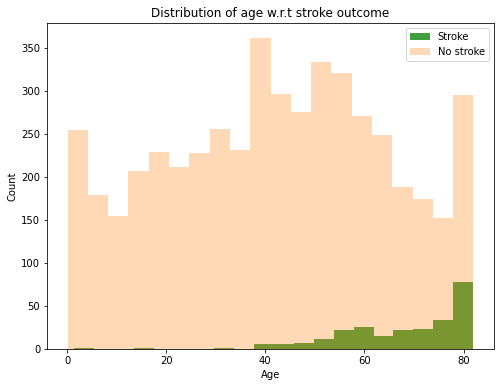

In [124]:
plt.figure(figsize=(8,6))
plt.hist(df[df.stroke == 1].age, bins =20, alpha=0.75, facecolor = 'g', label="Stroke");
plt.hist(df[df.stroke == 0].age, bins =20, alpha=0.3, label="No stroke");
plt.legend(loc='upper right');
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Distribution of age w.r.t stroke outcome');

As expected the age distrubtion of people who have stroke are skewed towards older ages. 

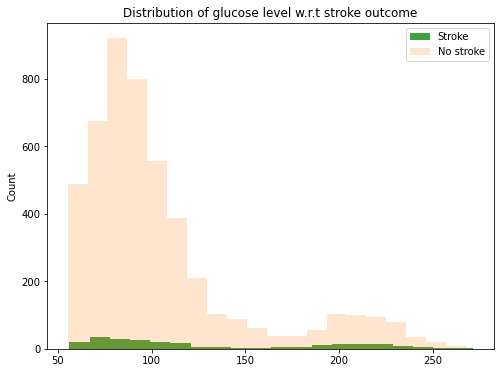

In [132]:
plt.figure(figsize = (8,6))
plt.hist(df[df.stroke == 1].avg_glucose_level, bins =20, alpha=0.75, facecolor = 'g', label="Stroke");
plt.hist(df[df.stroke == 0].avg_glucose_level, bins =20, alpha=0.2, label="No stroke");
plt.legend(loc='upper right');
plt.ylabel('Count');
plt.title('Distribution of glucose level w.r.t stroke outcome');

There seems to be a skew towards lower glucose levels in people who don't experience stroke. 

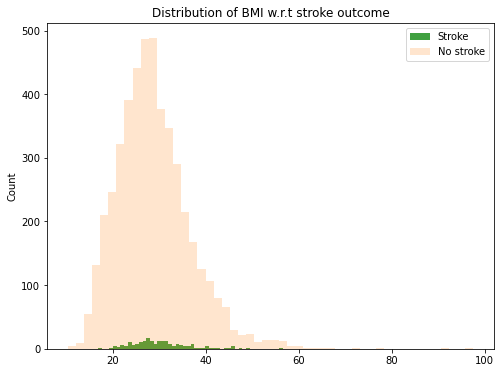

In [135]:
plt.figure(figsize = (8,6))
plt.hist(df[df.stroke == 1].bmi, bins =50, alpha=0.75, facecolor = 'g', label="Stroke");
plt.hist(df[df.stroke == 0].bmi, bins =50, alpha=0.2, label="No stroke");
plt.legend(loc='upper right');
plt.ylabel('Count');
plt.title('Distribution of BMI w.r.t stroke outcome');

No obvious difference in the BMI distributions between the two groups. Need to look into this further. 